# Keras Applications Comparison

- <https://keras.io/api/applications/>

## Available models Top 5 by Size

In [1]:
import numpy as np
import pandas as pd

raw = [{"model":"Xception","size":"88 MB","top-1 accuracy":"0.790","top-5 accuracy":"0.945","parameters":"22","depth":"910"},{"model":"VGG16","size":"528 MB","top-1 accuracy":"0.713","top-5 accuracy":"0.901","parameters":"138","depth":"357"},{"model":"VGG19","size":"549 MB","top-1 accuracy":"0.713","top-5 accuracy":"0.900","parameters":"143","depth":"667"},{"model":"ResNet50","size":"98 MB","top-1 accuracy":"0.749","top-5 accuracy":"0.921","parameters":"25","depth":"636"},{"model":"ResNet101","size":"171 MB","top-1 accuracy":"0.764","top-5 accuracy":"0.928","parameters":"44","depth":"707"},{"model":"ResNet152","size":"232 MB","top-1 accuracy":"0.766","top-5 accuracy":"0.931","parameters":"60","depth":"419"},{"model":"ResNet50V2","size":"98 MB","top-1 accuracy":"0.760","top-5 accuracy":"0.930","parameters":"25","depth":"613"},{"model":"ResNet101V2","size":"171 MB","top-1 accuracy":"0.772","top-5 accuracy":"0.938","parameters":"44","depth":"675"},{"model":"ResNet152V2","size":"232 MB","top-1 accuracy":"0.780","top-5 accuracy":"0.942","parameters":"60","depth":"380"},{"model":"InceptionV3","size":"92 MB","top-1 accuracy":"0.779","top-5 accuracy":"0.937","parameters":"23","depth":"851"},{"model":"InceptionResNetV2","size":"215 MB","top-1 accuracy":"0.803","top-5 accuracy":"0.953","parameters":"55","depth":"873"},{"model":"MobileNet","size":"16 MB","top-1 accuracy":"0.704","top-5 accuracy":"0.895","parameters":"4","depth":"253"},{"model":"MobileNetV2","size":"14 MB","top-1 accuracy":"0.713","top-5 accuracy":"0.901","parameters":"3","depth":"538"},{"model":"DenseNet121","size":"33 MB","top-1 accuracy":"0.750","top-5 accuracy":"0.923","parameters":"8","depth":"062"},{"model":"DenseNet169","size":"57 MB","top-1 accuracy":"0.762","top-5 accuracy":"0.932","parameters":"14","depth":"307"},{"model":"DenseNet201","size":"80 MB","top-1 accuracy":"0.773","top-5 accuracy":"0.936","parameters":"20","depth":"242"},{"model":"NASNetMobile","size":"23 MB","top-1 accuracy":"0.744","top-5 accuracy":"0.919","parameters":"5","depth":"326"},{"model":"NASNetLarge","size":"343 MB","top-1 accuracy":"0.825","top-5 accuracy":"0.960","parameters":"88","depth":"949"},{"model":"EfficientNetB0","size":"29 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"5","depth":"330"},{"model":"EfficientNetB1","size":"31 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"7","depth":"856"},{"model":"EfficientNetB2","size":"36 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"9","depth":"177"},{"model":"EfficientNetB3","size":"48 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"12","depth":"320"},{"model":"EfficientNetB4","size":"75 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"19","depth":"466"},{"model":"EfficientNetB5","size":"118 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"30","depth":"562"},{"model":"EfficientNetB6","size":"166 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"43","depth":"265"},{"model":"EfficientNetB7","size":"256 MB","top-1 accuracy":"-","top-5 accuracy":"-","parameters":"66","depth":"658"}]
df = pd.DataFrame(raw)

df['size'] = df['size'].replace(r'\D+', '', regex=True).astype('int64')
df['top-1 accuracy'] = df['top-1 accuracy'].replace(r'[^0-9.]', np.nan, regex=True)
df['top-5 accuracy'] = df['top-5 accuracy'].replace(r'[^0-9.]', np.nan, regex=True)
df = df.dropna(axis=0)

df.sort_values(by=['size', 'top-1 accuracy'], ascending=True).head(5)

,model,size,top-1 accuracy,top-5 accuracy,parameters,depth
12,MobileNetV2,14,0.713,0.901,3,538
11,MobileNet,16,0.704,0.895,4,253
16,NASNetMobile,23,0.744,0.919,5,326
13,DenseNet121,33,0.750,0.923,8,062
14,DenseNet169,57,0.762,0.932,14,307


## Dataset

In [2]:
# Upload file
# <https://unsplash.com/images/animals>

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

!unzip -qq animals.zip -d .

Saving animals.zip to animals.zip


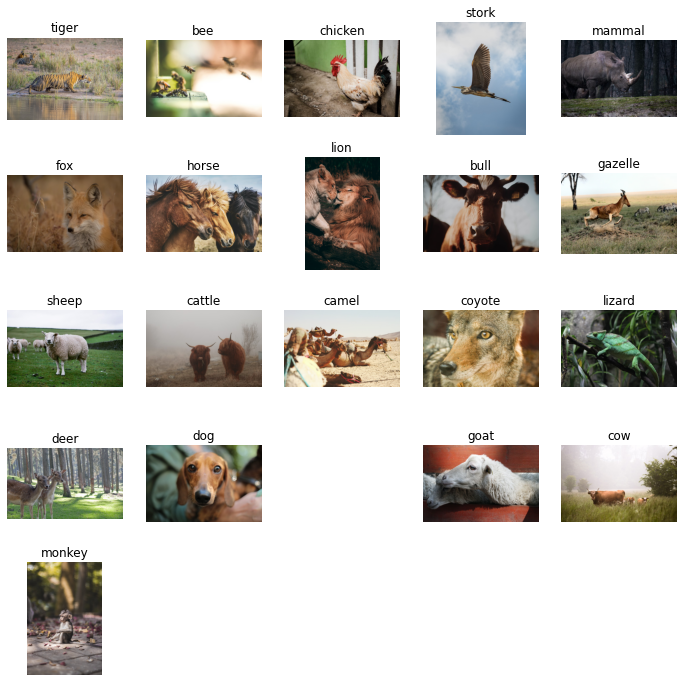

In [2]:
# Display uploaded files

import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
basedir = os.path.join(os.getcwd(), 'animals')
for i, f in enumerate(os.listdir(basedir)):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(5, 5, i+1)
  plt.title(filename)
  plt.axis('off')
  plt.imshow(img)

plt.show()

## Models

In [3]:
# Init Data Object
#
# data = {
#     'MobileNetV2': {'tiger':'shower_curtain', 'bee':'shower_curtain'},
#     'MobileNet': {'tiger':'shower_curtain', 'bee':'shower_curtain'},
# }
data = {}

### MobileNetV2

**Params**
```python
tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)
```

**Reference**
- <https://keras.io/api/applications/mobilenet/#mobilenetv2-function>

In [4]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions

mobilenetv2 = MobileNetV2()
# mobilenetv2.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = mobilenetv2.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(accuracy))
  
  name = 'MobileNetV2'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### MobileNet

**Params**
```python
tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)
```

**Reference**
- <https://keras.io/api/applications/mobilenet/#mobilenet-function>

In [5]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions

mobilenet = MobileNet()
# mobilenet.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = mobilenet.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(accuracy))

  name = 'MobileNet'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### NASNetMobile

**Params**
```python
tf.keras.applications.NASNetMobile(
    input_shape=None,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
)
```

**Reference**
- <https://keras.io/api/applications/nasnet/#nasnetmobile-function>

In [6]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.nasnet import NASNetMobile, decode_predictions

nasnetmobile = NASNetMobile()
# nasnetmobile.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = nasnetmobile.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(accuracy))

  name = 'NASNetMobile'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### DenseNet121

**Params**
```python
tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)
```

**Reference**
- <https://keras.io/api/applications/densenet/#densenet121-function>

In [7]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.densenet import DenseNet121, decode_predictions

densenet121 = DenseNet121()
# densenet121.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = densenet121.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(acc))

  name = 'DenseNet121'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### DenseNet169

**Params**
```python
tf.keras.applications.DenseNet169(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)
```

**Reference**
- <https://keras.io/api/applications/densenet/#densenet169-function>

In [8]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.densenet import DenseNet169, decode_predictions

densenet169 = DenseNet169()
# densenet169.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = densenet169.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(acc))

  name = 'DenseNet169'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### VGG19

**Params**
```python
tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```

**Reference**
- <https://keras.io/api/applications/vgg/#vgg19-function>

In [9]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions

vgg19 = VGG19()
# vgg19.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = vgg19.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(acc))

  name = 'VGG19'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### ResNet50

**Params**
```python
tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs
)
```

**Reference**
- <https://keras.io/api/applications/resnet/#resnet50-function>

In [10]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

resnet50 = ResNet50()
# resnet50.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224))
  # cv2_imshow(img)

  yhat = resnet50.predict(img.reshape(-1, 224, 224, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(acc))

  name = 'ResNet50'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

### InceptionResNetV2

**Params**
```python
tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)
```

**Reference**
- <https://keras.io/api/applications/inceptionresnetv2/>

In [11]:
import os
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions

inceptionresnetv2 = InceptionResNetV2(input_shape=(299,299,3))
# inceptionresnetv2.summary()

basedir = os.path.join(os.getcwd(), 'animals')
for f in os.listdir(basedir):
  basepath = os.path.join(basedir, f)
  filename, extension = os.path.splitext(f)

  if (not os.path.isfile(basepath)) \
      or (f in ['.DS_Store']) or (extension in ['.jpg']):
    continue

  img = cv2.imread(basepath, -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (299, 299))
  # cv2_imshow(img)

  yhat = inceptionresnetv2.predict(img.reshape(-1, 299, 299, 3))
  label = decode_predictions(yhat)
  label = label[0][0]

  pred = label[1]
  acc = label[2] * 100
  # print(filename, pred, '{:.2f}'.format(acc))

  name = 'InceptionResNetV2'
  try:
    data[name].update({filename:pred})
  except:
    data[name] = {}

## Summary

In [12]:
import pandas as pd
df = pd.DataFrame(data)
df

,MobileNetV2,MobileNet,NASNetMobile,DenseNet121,DenseNet169,VGG19,ResNet50,InceptionResNetV2
bee,shower_curtain,shower_curtain,limpkin,spotlight,binoculars,ant,spotlight,comic_book
chicken,shower_curtain,shower_curtain,cardoon,honeycomb,Gila_monster,cock,cock,comic_book
stork,window_screen,rock_beauty,limpkin,analog_clock,analog_clock,redshank,limpkin,comic_book
mammal,shower_curtain,shower_curtain,steel_arch_bridge,honeycomb,weevil,hippopotamus,water_buffalo,comic_book
fox,shower_curtain,shower_curtain,steel_arch_bridge,oil_filter,hourglass,coyote,coyote,comic_book
horse,shower_curtain,coral_reef,electric_locomotive,lampshade,Gila_monster,feather_boa,mailbag,comic_book
lion,shower_curtain,coral_reef,steel_arch_bridge,lampshade,Gila_monster,ice_bear,American_alligator,comic_book
bull,shower_curtain,shower_curtain,typewriter_keyboard,lampshade,cup,jersey,fountain,comic_book
gazelle,shower_curtain,digital_clock,cardoon,analog_clock,oboe,hartebeest,whippet,comic_book
sheep,shower_curtain,digital_clock,redbone,golf_ball,digital_clock,white_wolf,ram,comic_book
